<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/CNN_with_cifar10_Plus_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [7]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
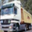

In [10]:
x_train[1]

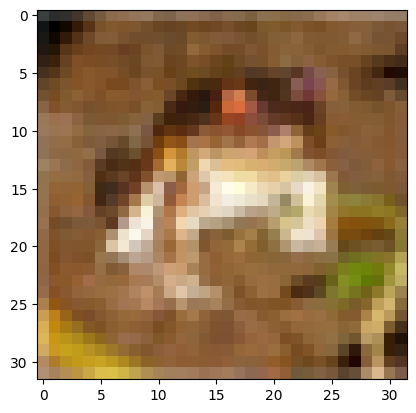

In [53]:
plt.imshow(x_train[0])

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Data Augmentation

In [18]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [19]:
datagen.fit(x_train)

In [37]:
model = models.Sequential()

In [38]:
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [39]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 64), epochs= 15, validation_data = (x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 46ms/step - accuracy: 0.3495 - loss: 2.1106 - val_accuracy: 0.4164 - val_loss: 1.6453
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5405 - loss: 1.2957 - val_accuracy: 0.3827 - val_loss: 2.5114
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5946 - loss: 1.1386 - val_accuracy: 0.5137 - val_loss: 1.5231
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6336 - loss: 1.0360 - val_accuracy: 0.5568 - val_loss: 1.4529
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6541 - loss: 0.9800 - val_accuracy: 0.5042 - val_loss: 1.8486
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.6678 - loss: 0.9324 - val_accuracy: 0.6874 - val_loss: 0.9012
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6862 - loss: 0.8946 - val_accuracy: 0.5850 - val_loss: 1.3498
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6983 - loss: 0.8584 - 

In [41]:
model.save('cnn_cifar10_model.h5')
print("Model saved!")

Model saved!


In [42]:
model = models.load_model('/content/cnn_cifar10_model.h5')
print('model loaded')

model loaded


In [43]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [46]:
img_index = 3
actual = np.argmax(y_test[img_index])
img = x_test[img_index]

In [56]:
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Actual: cat
Predicted: cat


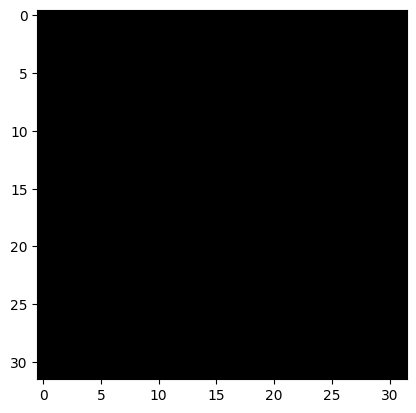

In [54]:
plt.imshow(img)
print(f"Actual: {class_names[actual]}")
print(f"Predicted: {class_names[predicted_class]}")

In [57]:
loss_test, acc_test = model.evaluate(x_test, y_test)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)